PS: Classification using Deep Neural Network - Binary classification using Deep Neural Networks Example: Classify movie reviews into positive" reviews and "negative" reviews, just based on the text content of the reviews. Use IMDB dataset

# CSV Version (Exam pov)

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Load the IMDb dataset
df = pd.read_csv("https://raw.githubusercontent.com/Srushti-S/BE_Assignments/main/LP5/DL/IMDB_Dataset.csv")

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
max_words = 1000      # Number of words to be extracted from 1 particular row while importing the dataset
max_len = 150         # For each sentence in 1 row, consider only 1st 100 common words [Cut texts after this number of words (among top max_features most common words)]

tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(df['review'])
X = tokenizer.texts_to_sequences(df['review'])

X = pad_sequences(X, maxlen=max_len)
y = np.array(df['sentiment'].map({'positive': 1, 'negative': 0}))

In [ ]:
X

array([[433,  14,  12, ...,  16, 125, 486],
       [  0,   0,   0, ...,  23,  69, 221],
       [  0,   0,   0, ...,  63,  16, 350],
       ...,
       [262, 764, 177, ...,  16,   2,   2],
       [  0,   0,   0, ...,  67, 739,  42],
       [  0,   0,   0, ..., 794,  11,  17]], dtype=int32)

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
# Build the neural network model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=32, input_length=max_len),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
250/250 [==============================] - 3s 11ms/step - loss: 0.4817 - accuracy: 0.7527 - val_loss: 0.3371 - val_accuracy: 0.8533
Epoch 2/5
250/250 [==============================] - 3s 11ms/step - loss: 0.2958 - accuracy: 0.8748 - val_loss: 0.3406 - val_accuracy: 0.8501
Epoch 3/5
250/250 [==============================] - 2s 8ms/step - loss: 0.2337 - accuracy: 0.9069 - val_loss: 0.3652 - val_accuracy: 0.8428
Epoch 4/5
250/250 [==============================] - 2s 8ms/step - loss: 0.1631 - accuracy: 0.9438 - val_loss: 0.4291 - val_accuracy: 0.8290
Epoch 5/5
250/250 [==============================] - 2s 8ms/step - loss: 0.1012 - accuracy: 0.9714 - val_loss: 0.4968 - val_accuracy: 0.8273


In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.4829 - accuracy: 0.8308
Test Loss: 0.48288047313690186
Test Accuracy: 0.8307999968528748


# Proper DL implemetation!

In [1]:
from tensorflow.keras.datasets import imdb
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Vectorization
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
# Model Building
model = Sequential()
model.add(Dense(16, input_shape=(10000,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [2]:
# Model Compiling
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(x_train, y_train, validation_split=0.3, epochs=20, batch_size=512)

# Model Evaluation
loss, accuracy = model.evaluate(x_test, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20
35/35 [==============================] - 3s 60ms/step - loss: 0.5228 - accuracy: 0.7881 - val_loss: 0.3595 - val_accuracy: 0.8723
Epoch 2/20
35/35 [==============================] - 1s 34ms/step - loss: 0.2714 - accuracy: 0.9077 - val_loss: 0.2787 - val_accuracy: 0.8904
Epoch 3/20
35/35 [==============================] - 1s 33ms/step - loss: 0.1902 - accuracy: 0.9352 - val_loss: 0.2753 - val_accuracy: 0.8905
Epoch 4/20
35/35 [==============================] - 1s 31ms/step - loss: 0.1430 - accuracy: 0.9545 - val_loss: 0.2851 - val_accuracy: 0.8864
Epoch 5/20
35/35 [==============================] - 1s 33ms/step - loss: 0.1102 - accuracy: 0.9677 - val_loss: 0.3075 - val_accuracy: 0.8848
Epoch 6/20
35/35 [==============================] - 1s 29ms/step - loss: 0.0864 - accuracy: 0.9764 - val_loss: 0.3380 - val_accuracy: 0.8817
Epoch 7/20
35/35 [==============================] - 1s 30ms/step - loss: 0.0655 - accuracy: 0.9837 - val_loss: 0.3674 - val_accuracy: 0.8775
Epoch 8/20
35

In [3]:
# Make predictions
predictions = model.predict(x_test)

# Convert predictions to binary
binary_predictions = np.round(predictions)

782/782 [==============================] - 2s 2ms/step


In [4]:
# Calculate confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, binary_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10741  1759]
 [ 1943 10557]]


In [5]:
# Calculate metrics
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, binary_predictions))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85     12500
         1.0       0.86      0.84      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



In [6]:
# Plot ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

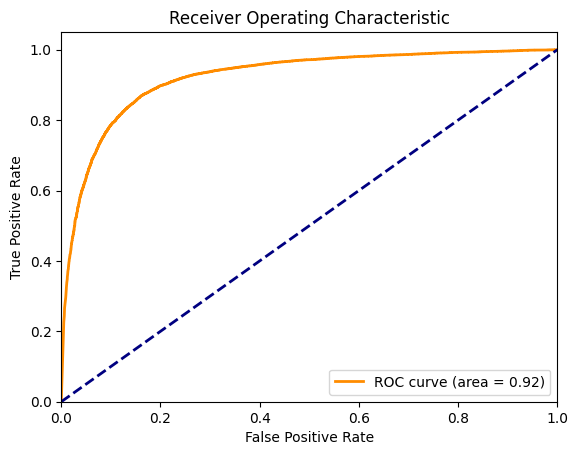

In [7]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Simple Version (keras dataset)

In [ ]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Load the IMDb dataset
vocab_size = 10000    # Number of words to be extracted from 1 particular row while importing the dataset
max_len = 300         # For each sentence in 1 row, consider only 1st 100 common words [Cut texts after this number of words (among top max_features most common words)]
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to ensure uniform length
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
# Build the neural network model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=32, input_length=max_len),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 8s 31ms/step - loss: 0.5473 - accuracy: 0.7034 - val_loss: 0.3180 - val_accuracy: 0.8676
Epoch 2/5
157/157 [==============================] - 4s 28ms/step - loss: 0.2043 - accuracy: 0.9231 - val_loss: 0.2887 - val_accuracy: 0.8766
Epoch 3/5
157/157 [==============================] - 5s 34ms/step - loss: 0.0763 - accuracy: 0.9805 - val_loss: 0.3115 - val_accuracy: 0.8778
Epoch 4/5
157/157 [==============================] - 4s 23ms/step - loss: 0.0237 - accuracy: 0.9973 - val_loss: 0.3513 - val_accuracy: 0.8744
Epoch 5/5
157/157 [==============================] - 3s 17ms/step - loss: 0.0087 - accuracy: 0.9998 - val_loss: 0.3829 - val_accuracy: 0.8758


In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

782/782 [==============================] - 2s 2ms/step - loss: 0.3810 - accuracy: 0.8732
Test Loss: 0.38101160526275635
Test Accuracy: 0.8731600046157837
